In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import popup_window as popup

In [2]:
def blur_img(img, factor = 20):

        kW = int(img.shape[1] / factor)
        kH = int(img.shape[0] / factor)

        #ensure the shape of the kernel is odd
        if kW % 2 == 0: kW = kW - 1
        if kH % 2 == 0: kH = kH - 1

        blurred_img = cv2.GaussianBlur(img, (kW, kH), 0)
        return blurred_img

In [3]:
def face_blur(image):

    base_img = image.copy()

    blurred_img = blur_img(image, factor = 20)
    plt.axis('off')
    plt.imshow(blurred_img[:,:,::-1])

    face_detector = cv2.CascadeClassifier()

    faces = face_detector.detectMultiScale(image, 1.3, 5)

    for x, y, w, h in faces:
        detected_face = image[int(y):int(y+h), int(x):int(x+w)]
        detected_face_blurred = blur_img(detected_face, factor = 3)
    
        #plt.imshow(detected_face[:,:,::-1])
    
        blurred_img[y:y+h, x:x+w] = detected_face
        base_img[y:y+h, x:x+w] = detected_face_blurred

    plt.imshow(blurred_img[:,:,::-1])
    plt.title("Output Image")
    plt.show()

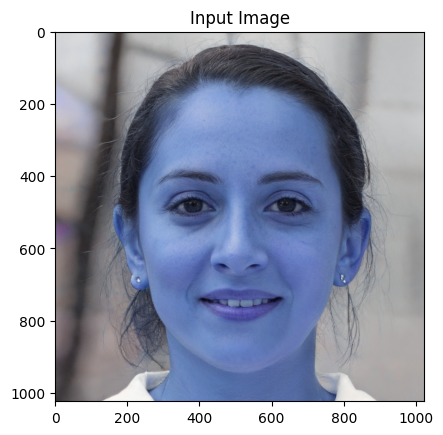

error: OpenCV(4.8.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


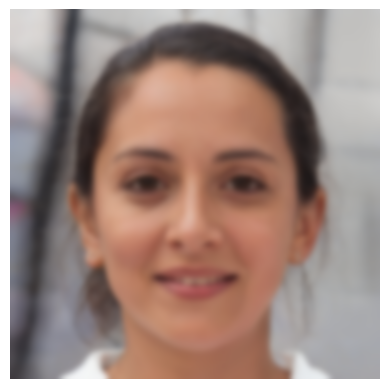

In [4]:
if __name__ == "__main__":
    popup.input_window(face_blur)